# Supervised Learning
### Benign and malignant cancer

                               id  diagnosis  radius_mean  texture_mean   
id                       1.000000   0.039769     0.074626      0.099770  \
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                

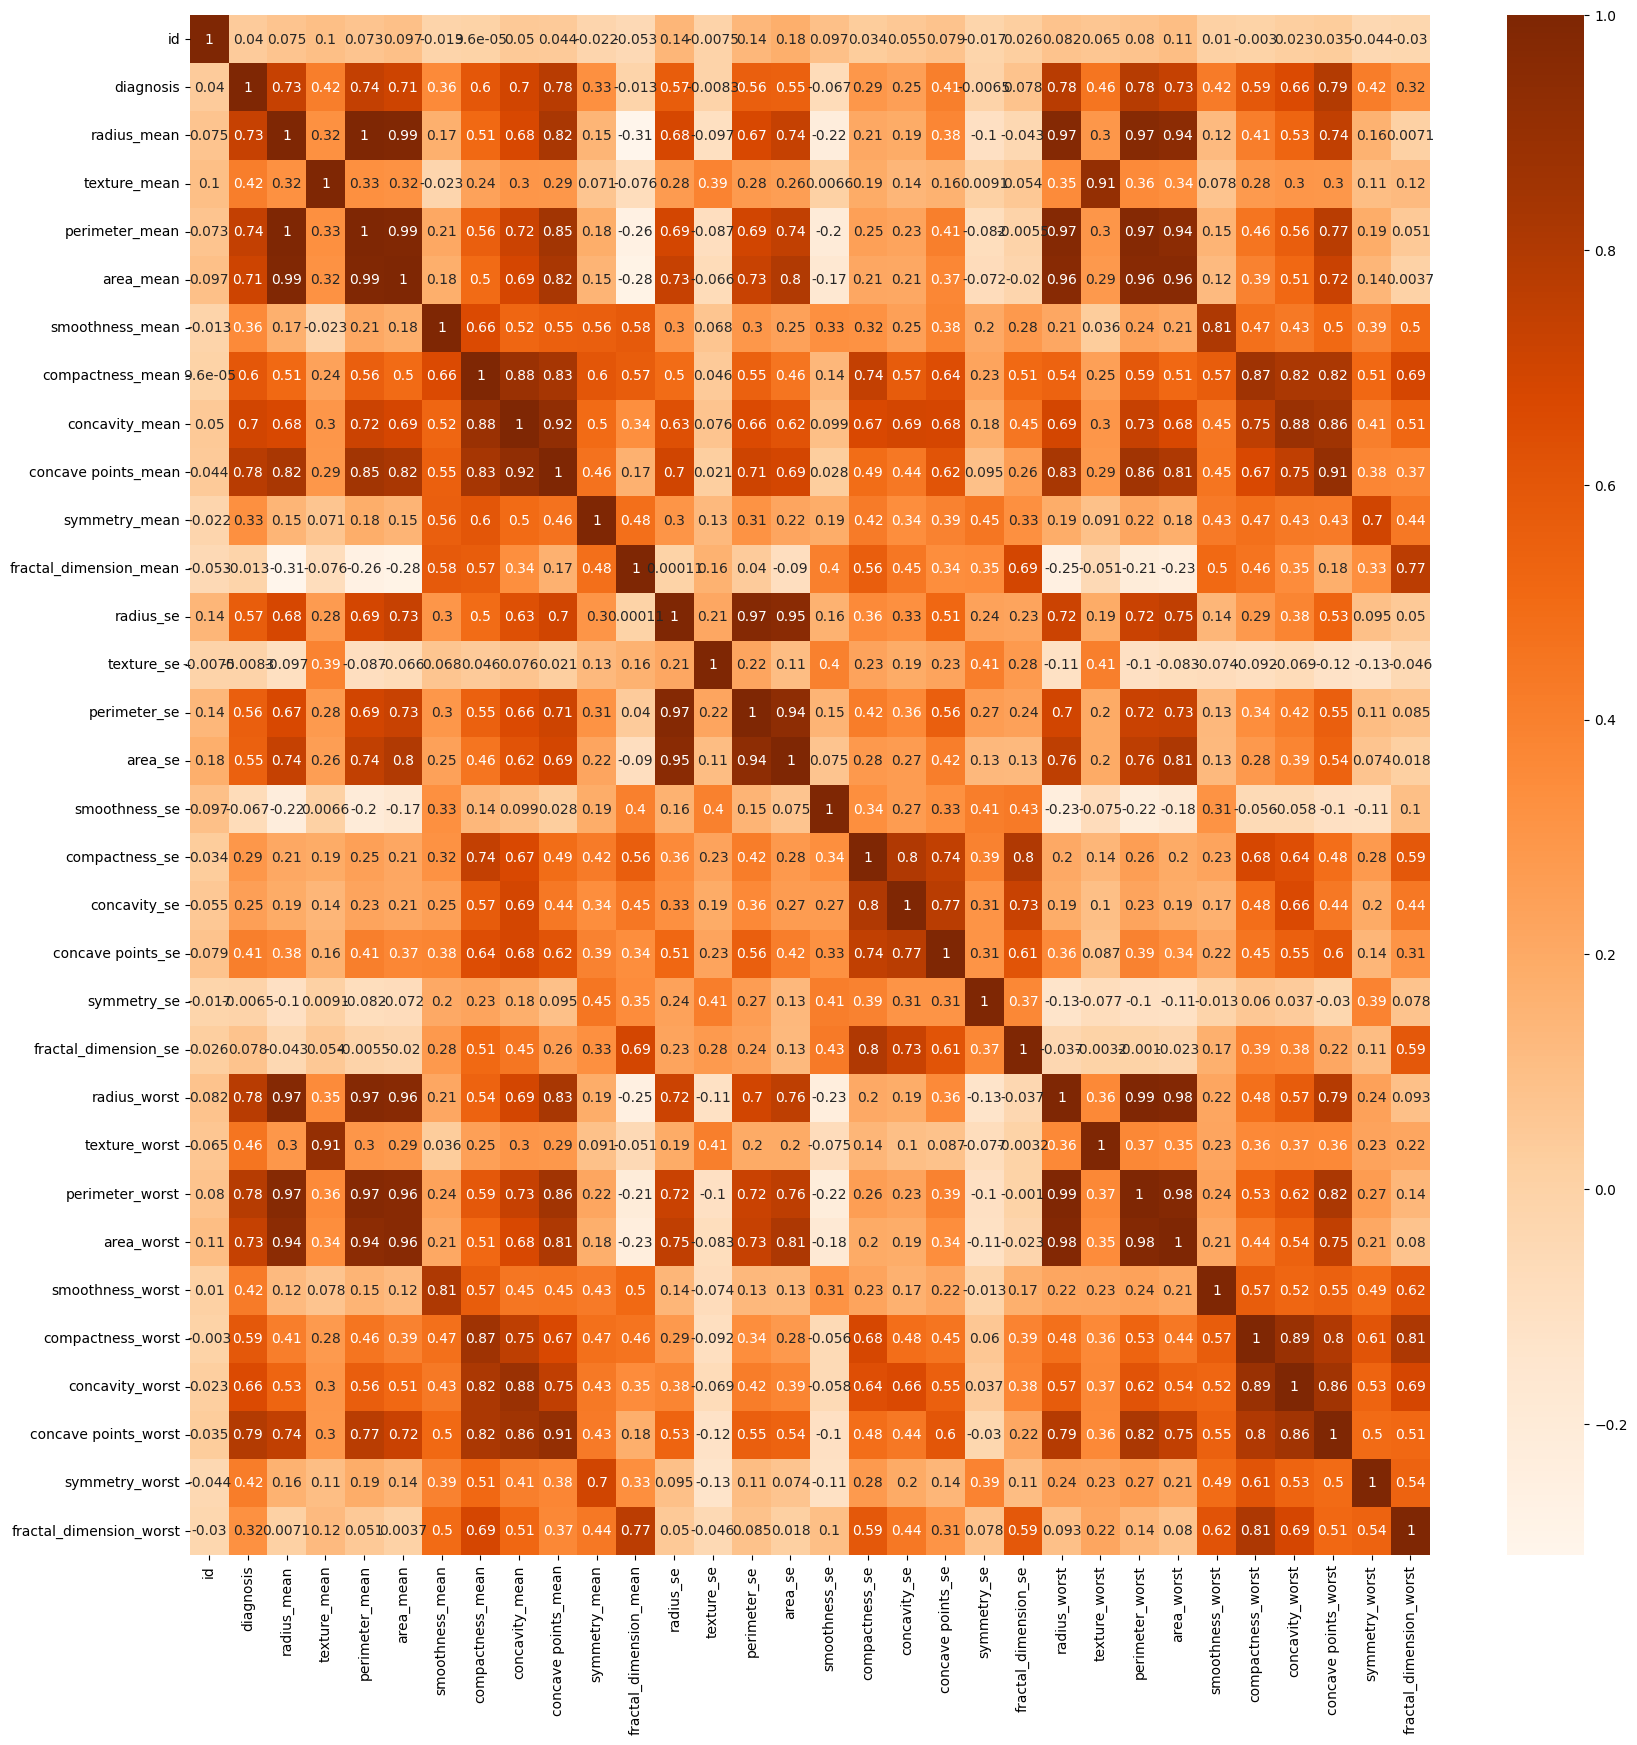

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

dataset = pd.read_csv("../data/Cancer_Data.csv")

if 'Unnamed: 32' in dataset.columns:
    dataset.drop('Unnamed: 32', axis=1, inplace=True)
dataset['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True) # B = 0, M = 1 

plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),cbar=True,annot=True,cmap='Oranges')
print(dataset.corr())
plt.show()

dataset

In [64]:
from sklearn.model_selection import train_test_split

x = dataset.drop(['diagnosis','id'],axis=1)
y = dataset['diagnosis']



### Decision Tree

First, we will analyse the dataset with all information, and for that, we first need to create a decision tree.
Our first decision tree will be a default one, created by the scikit learn library.

In [65]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf = DecisionTreeClassifier() 


Now, we send the decision tree our train sample.

In [66]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

To make the predictions we call the function:

In [67]:
predictions = clf.predict(x_test)

dt_accuracy = accuracy_score(y_test, predictions)
dt_precision = precision_score(y_test, predictions)
dt_recall = recall_score(y_test, predictions)
dt_f1 = f1_score(y_test, predictions)

 (We also defined a function to plot the confusion matrix, which we will use later on). MUDAR ISTO PARA FAZER SENTIDO, TIVE QUE BAZAR E YA UELELEEEE

In [68]:
def show_plot(y_pred, accuracy, precision, recall, f1_score):

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap=plt.cm.Oranges)
    plt.title("Confusion Matrix\nAccuracy: {:.3f} - Precision: {:.3f} - Recall: {:.3f} - F1 Score: {:.3f}".format(accuracy, precision, recall, f1_score))
    plt.colorbar()
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.xticks([0, 1], ["Benign", "Malignant"])
    plt.yticks([0, 1], ["Benign", "Malignant"])

    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

    plt.show()

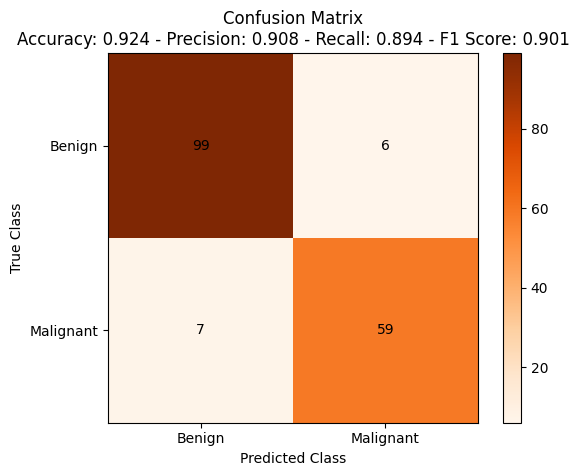

In [69]:
show_plot(predictions,dt_accuracy,dt_precision,dt_recall,dt_f1)

With this code, we can see the importance given to each feature of the dataset by the decision tree.

In [38]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

,%
perimeter_worst,0.716344
concave points_worst,0.117081
texture_worst,0.062529
concave points_mean,0.027255
smoothness_worst,0.022175
compactness_mean,0.012773
smoothness_mean,0.009825
radius_worst,0.008994
smoothness_se,0.008870
area_se,0.007790


In our dataset, we have 3 type of data:
 - worst: worst value recorded from that person
 - se: standard error
 - mean: mean a list of values

To see if we can improve our accuracy and precision, we are going to try to separate these 3 types and we will run it with the same decision tree to see if our results improve.<br>
We will also use the same lines as x_train and x_test so we can compare our results.

#### Dataset only with "Worst" values

In [39]:
x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])


clf.fit(x_worst_train,y_train)
predictions_worst = clf.predict(x_worst_test)
accuracy_score(y_test, predictions_worst)

0.9473684210526315

In [40]:
precision_score(y_test, predictions_worst)

0.9322033898305084

In [41]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_worst)

0.9166666666666666

In [42]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_worst_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

,%
perimeter_worst,0.733824
concave points_worst,0.139314
texture_worst,0.079114
radius_worst,0.019047
fractal_dimension_worst,0.010053
smoothness_worst,0.009825
area_worst,0.007637
symmetry_worst,0.001187
concavity_worst,0.000000
compactness_worst,0.000000


#### Dataset only with "Mean" values

In [43]:
x_mean_train = x_train.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])
x_mean_test = x_test.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])


clf.fit(x_mean_train,y_train)
predictions_mean = clf.predict(x_mean_test)
accuracy_score(y_test, predictions_mean)

0.9181286549707602

In [44]:
precision_score(y_test, predictions_mean)

0.9107142857142857

In [45]:
feature_importance_mean = pd.DataFrame(clf.feature_importances_, index = x_mean_test.columns).sort_values(0, ascending=False)
feature_importance_mean.columns = ['%']
feature_importance_mean

,%
concave points_mean,0.678084
texture_mean,0.083448
perimeter_mean,0.063784
concavity_mean,0.042591
radius_mean,0.041661
area_mean,0.038141
fractal_dimension_mean,0.023062
compactness_mean,0.019767
smoothness_mean,0.009461
symmetry_mean,0.000000


#### Dataset only with "SE" values

In [46]:
x_se_train = x_train.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])
x_se_test = x_test.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])


clf.fit(x_se_train,y_train)
predictions_se = clf.predict(x_se_test)
accuracy_score(y_test, predictions_se)

0.8654970760233918

In [47]:
precision_score(y_test, predictions_se)

0.7681159420289855

In [48]:
feature_importance_se = pd.DataFrame(clf.feature_importances_, index = x_se_test.columns).sort_values(0, ascending=False)
feature_importance_se.columns = ['%']
feature_importance_se

,%
area_se,0.584861
concavity_se,0.096888
texture_se,0.074620
radius_se,0.067644
smoothness_se,0.055024
symmetry_se,0.041006
perimeter_se,0.037172
concave points_se,0.022680
fractal_dimension_se,0.020105
compactness_se,0.000000


#### Dataset without "SE" values

Since the SE values got the worst results, we will try to use the all the dataset but without the SE values to see if the predictions are better

In [49]:
x_worstMean_train = x_train.drop(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'], axis=1)
x_worstMean_test = x_test.drop(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'], axis=1)

clf.fit(x_worstMean_train,y_train)
predictions_worstMean = clf.predict(x_worstMean_test)
accuracy_score(y_test, predictions_worstMean)

0.935672514619883

In [50]:
precision_score(y_test, predictions_worstMean)

0.9152542372881356

In [51]:
feature_importance_worstMean = pd.DataFrame(clf.feature_importances_, index = x_worstMean_test.columns).sort_values(0, ascending=False)
feature_importance_worstMean.columns = ['%']
feature_importance_worstMean

,%
perimeter_worst,0.724854
concave points_worst,0.126907
texture_worst,0.059156
concave points_mean,0.032429
radius_worst,0.023881
smoothness_worst,0.022175
concavity_mean,0.008870
symmetry_worst,0.001187
area_worst,0.000541
concavity_worst,0.000000


We gathered 30 results from each dataset and calculated the mean of each one to see the differences.<br>
<br>

The average accuracy of each dataset was:
 - "Worst" Values: 0,93410
 - Without "SE" Values: 0,92577 
 - Normal Datase: 0,92027
 - "Mean" Values: 0,90863
 - "SE" Values: 0,87820

<br>

![Alt text](../images/decision_tree_accuracy.png)

<br>
In this graph we can see that the dataset with the "worst" columns has the best results in terms of accuracy but it's still very close to the dataset without the Standard Error (SE) columns and with the Normal dataset.
<br>


The same happened with the precision, being the dataset with the "Worst" values the best one.

 - "Worst" Values: 0,91085
 - Without "SE" Values: 0,90221
  - Normal Datase: 0,89370
 - "Mean" Values: 0,87820
 - "SE" Values: 0,76504

<br>

![Alt text](../images/decision_tree_precision.png)

<br>

The fact that the values are all very close might be explained by the fact that the Decision tree algorithm uses the greedy algorithm at each split finding a local optima, since "worst" values give the best results, all the datasets containing that values are going to be very similar. <br>
A way to improve decision trees is to avoid overfitting. This could be made by limiting maximum depth, pruning etc.
When we prune a tree we are correcting it after it has been fitted to the training dataset. It starts at the leaf nodes and removes those branches that do not affect the overall tree accuracy. It also lowers the complexity of the model.
<br>
In our code we can use sklearn to prune our trees using the ``ccp_alpha`` attribute inside the ``DecisionTreeClassifier`` function.


#### Dataset with "worst" values using pruning

To prune a tree using sklearn we have to set the attribute `ccp_alpha` inside the `DecisionTreeClassifier` function but this value varies with each tree.<br>
A way to calculate the best alpha value for each tree is to get the different applicable alpha values. Then we just run the same decision tree with the different alpha values to get the accuracy.<br>
The code below shows the relation between alpha and accuracy.

Text(0, 0.5, 'Accuracy scores')

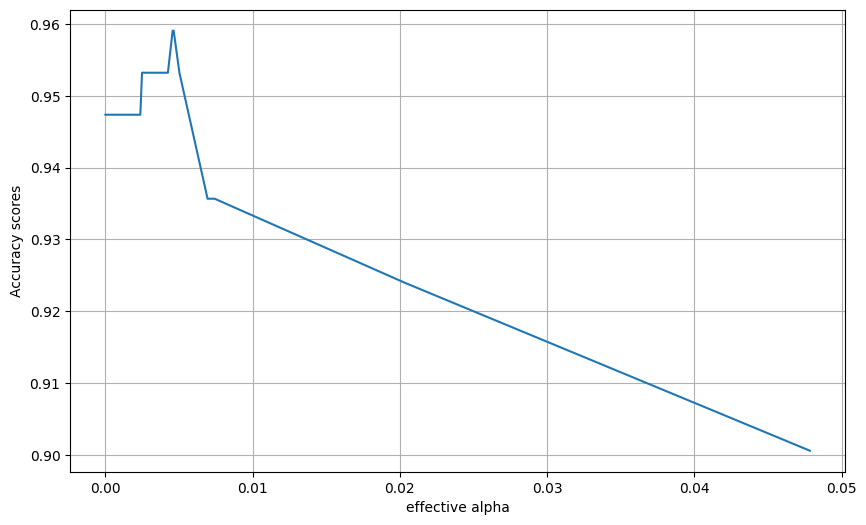

In [52]:
path = clf.cost_complexity_pruning_path(x_worst_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf_worst = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_worst.fit(x_worst_train, y_train)
    clfs.append(clf_worst)

acc_scores = [accuracy_score(y_test, clf_worst.predict(x_worst_test)) for clf_worst in clfs]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [53]:
from statistics import mean
accuracy_values = []

for i in range(100):
    x_alpha = x.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

    x_alpha_train, x_alpha_test, y_alpha_train, y_alpha_test = train_test_split(x_alpha, y, test_size=0.3)
    
    clf_alpha = DecisionTreeClassifier() 

    path = clf_alpha.cost_complexity_pruning_path(x_alpha_train, y_alpha_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    clfs = []

    for ccp_alpha in ccp_alphas:
        clf_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf_alpha.fit(x_alpha_train, y_alpha_train)
        clfs.append(clf_alpha)

    acc_scores = [accuracy_score(y_alpha_test, clf_alpha.predict(x_alpha_test)) for clf_alpha in clfs]
    accuracy_values.append(max(acc_scores))

mean(accuracy_values)

    


0.9466666666666667

### Support Vector Machine

Suppot vector machines (SVM) attempt to find a hyperplane in an space of N dimensions, where N is the number of classification attributes. <br>This hyperplane is used to separate the data into two distinct classes, in our case, benign and malignant cancer.

We will use the same datasets as before, and start by an SVM classifier object and fit it to our training data. We then make a prediction using the test data and calculate the accuracy and precision, as well as the confusion matrix.

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score

svm = SVC()
svm.fit(x_train, y_train)

svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [55]:
y_pred = svm.predict(x_test)


svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

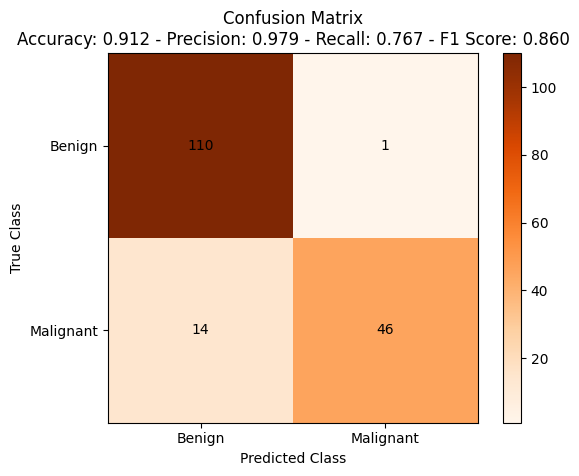

In [57]:
show_plot(y_pred, svm_accuracy, svm_precision, svm_recall, svm_f1)

As we can see in the confusion matrix, the SVM classifier shows promising results. However, we can try to improve it by removing attributes that could muddle the model. This would also reduce the number of dimensions we have to deal with, which simplifies the model.
<br> We'll do this by dividing the features into three groups: worst, mean and standard error. We'll then run the SVM classifier on each group and compare the results.

#### Dataset with only "Worst" features

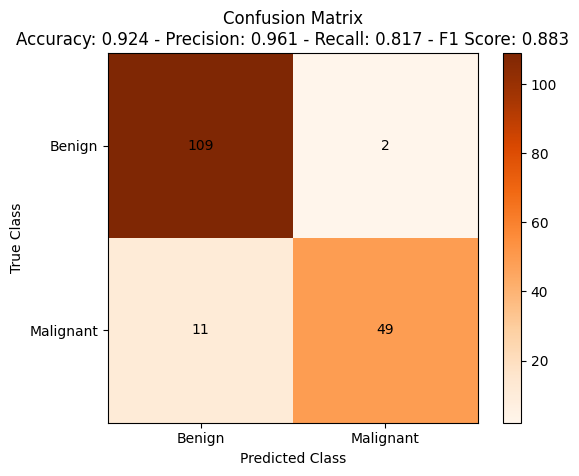

In [58]:
x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

svm.fit(x_worst_train,y_train)
svm_predictions_worst = svm.predict(x_worst_test)

svm_accuracy_worst = accuracy_score(y_test, svm_predictions_worst)
svm_precision_worst = precision_score(y_test, svm_predictions_worst)
svm_recall_worst = recall_score(y_test, svm_predictions_worst)
svm_f1_worst = f1_score(y_test, svm_predictions_worst)

show_plot(svm_predictions_worst, svm_accuracy_worst, svm_precision_worst, svm_recall_worst, svm_f1_worst)

#### Dataset with only "Mean" features

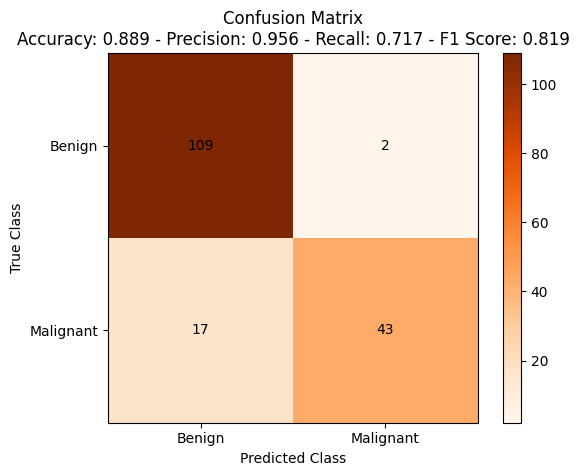

In [59]:
x_mean_train = x_train.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])
x_mean_test = x_test.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])



svm.fit(x_mean_train,y_train)
svm_predictions_mean = svm.predict(x_mean_test)

svm_accuracy_mean = accuracy_score(y_test, svm_predictions_mean)
svm_precision_mean = precision_score(y_test, svm_predictions_mean)
svm_recall_mean = recall_score(y_test, svm_predictions_mean)
svm_f1_mean = f1_score(y_test, svm_predictions_mean)

show_plot(svm_predictions_mean, svm_accuracy_mean, svm_precision_mean, svm_recall_mean, svm_f1_mean)

#### Dataset with only "Standard Error" features

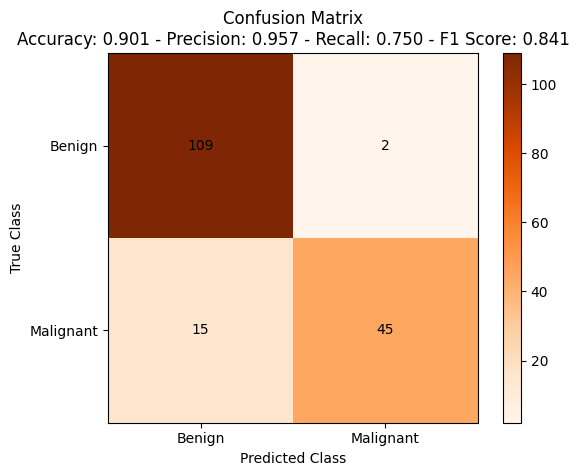

In [60]:
x_se_train = x_train.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])
x_se_test = x_test.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])



svm.fit(x_se_train,y_train)
svm_predictions_se = svm.predict(x_se_test)

svm_accuracy_se = accuracy_score(y_test, svm_predictions_se)
svm_precision_se = precision_score(y_test, svm_predictions_se)
svm_recall_se = recall_score(y_test, svm_predictions_se)
svm_f1_se = f1_score(y_test, svm_predictions_se)

show_plot(svm_predictions_se, svm_accuracy_se, svm_precision_se, svm_recall_se, svm_f1_se)

From the previous tests we can conclude that, just like with the decision tree, the dataset with the worst features has the best results.
<br> We can also see that SVM gets better values all around compared to the decision tree, which is expected since SVM can handle outliers better than the decision tree by allowing some misclassification. 

We are getting good results but we can still try to improve our model. From now on we'll only use the dataset with the "Worst" features, and we'll try to improve the model by tuning the hyperparameters. We'll use the GridSearchCV function from sklearn to find the best hyperparameters for our model.

In [62]:
from sklearn.model_selection import GridSearchCV, KFold


param_grid = {
    'C': [0.1, 1, 4], #penalty parameter of error term -> increase can lead to over fitting
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4], #1 == linear, 
    'gamma': ['scale', 'auto'], #the higher the gamma, the more influence closer points have
    'shrinking': [True, False],
    'verbose': [2]
}

cv = KFold(n_splits=10)

grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=cv) # Perform grid search with cross-validation
grid_search.fit(x_worst_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_prediction = best_model.predict(x_worst_test)

best_accuracy = accuracy_score(y_test, best_prediction)
best_precision = precision_score(y_test, best_prediction)
best_recall = recall_score(y_test, best_prediction)
best_f1 = f1_score(y_test, best_prediction)

show_plot(best_prediction, best_accuracy, best_precision, best_recall, best_f1)

[LibSVM]................................................................................................................................*..............................................................................................................................................................*.....................................................................................................................................................................................*..................................................................*..............................................................................................................................................................................................................................*........................................................................................................................................................................................................................................

KeyboardInterrupt: 